In [1]:
#2.1
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png').convert('L')
a = np.asarray(data)
# performing Otsu's thresholding
thres = threshold_otsu(a)
# pixels with intensity greater than theshold are kept
b = a > thres
# labelling is performed on b
c = label(b)
cl = Image.fromarray(c)
iio.imsave('label_output.jpg', cl)
# on the labelled image c, regionprops is performed
properties = ['Area', 'Centroid', 'BoundingBox']
d = regionprops(c)
# the following command creates an empty plot of
# dimension 6 inch by 6 inch
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(c, cmap='YlOrRd')

for i in d:
    lr, lc, ur, uc = i['BoundingBox']
    rec_width = uc - lc
    rec_height = ur - lr
    # Rectangular boxes with origin at (lr,lc) are drawn
    rect = mpatches.Rectangle((lc, lr), rec_width, rec_height, fill=False,
                              edgecolor='black', linewidth=2)

    ax.add_patch(rect)
plt.show()


OSError: cannot write mode I as JPEG

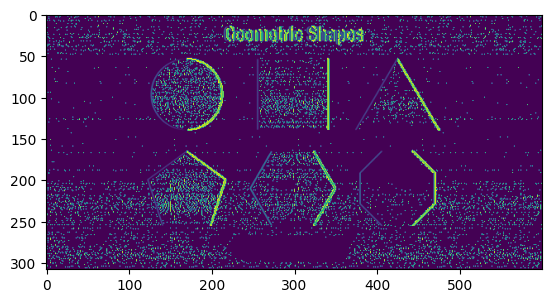

In [2]:
#2.2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png').convert('L')
bmg = abs(data - nd.shift(data, (0, 1), order=0))
plt.imshow(bmg)
plt.show()


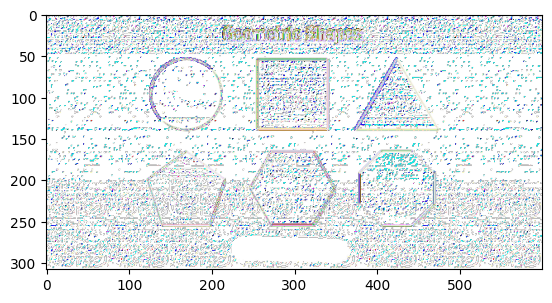

In [3]:
#2.3
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png')
a = nd.sobel(data, axis=0)
b = nd.sobel(data, axis=1)
bmg = abs(a) + abs(b)
plt.imshow(bmg)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-49.800000000000004..255.0].


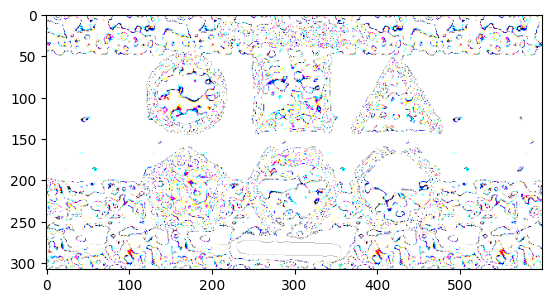

In [4]:
#2.4
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

def Harris(indata, alpha=0.2):
    x = nd.sobel(indata, 0)
    y = nd.sobel(indata, 1)
    xl = x ** 2
    yl = y ** 2
    xy = abs(x * y)
    xl = nd.gaussian_filter(xl,3)
    yl = nd.gaussian_filter(yl,3)
    xy = nd.gaussian_filter(xy,3)

    detC = xl * yl - 2 * xy
    trC = xl + yl
    R = detC - alpha * trC**2
    return R

data = Image.open('geometric.png')
bmg = Harris(data)
plt.imshow(bmg)
plt.show()


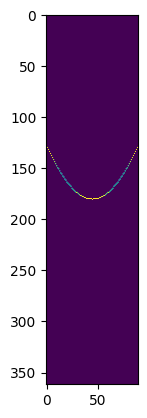

In [5]:
#2.5.1
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

def LineHough(data, gamma):
    V, H = data.shape
    R = int(np.sqrt(V * V + H * H))
    ho = np.zeros((R, 90), float)  # Hough space
    w = data + 0
    ok = 1
    theta = np.arange(90)/180.0 * np.pi
    tp = np.arange(90).astype(float)
    while ok:
        mx = w.max()
        if mx < gamma:
            ok = 0
        else:
            v,h = divmod(w.argmax(), H)
            y = V - v
            x = h
            rh = x * np.cos(theta) + y * np.sin(theta)
            for i in range(len(rh)):
                if 0 <= rh[i] < R and 0 <= tp[i] < 90:
                    ho[int(rh[i]), int(tp[i])] += mx
            w[v,h] = 0
    return ho

data = np.zeros((256, 256))
data[128, 128] = 1
bmg = LineHough(data, 0.5)
plt.imshow(bmg)
plt.show()



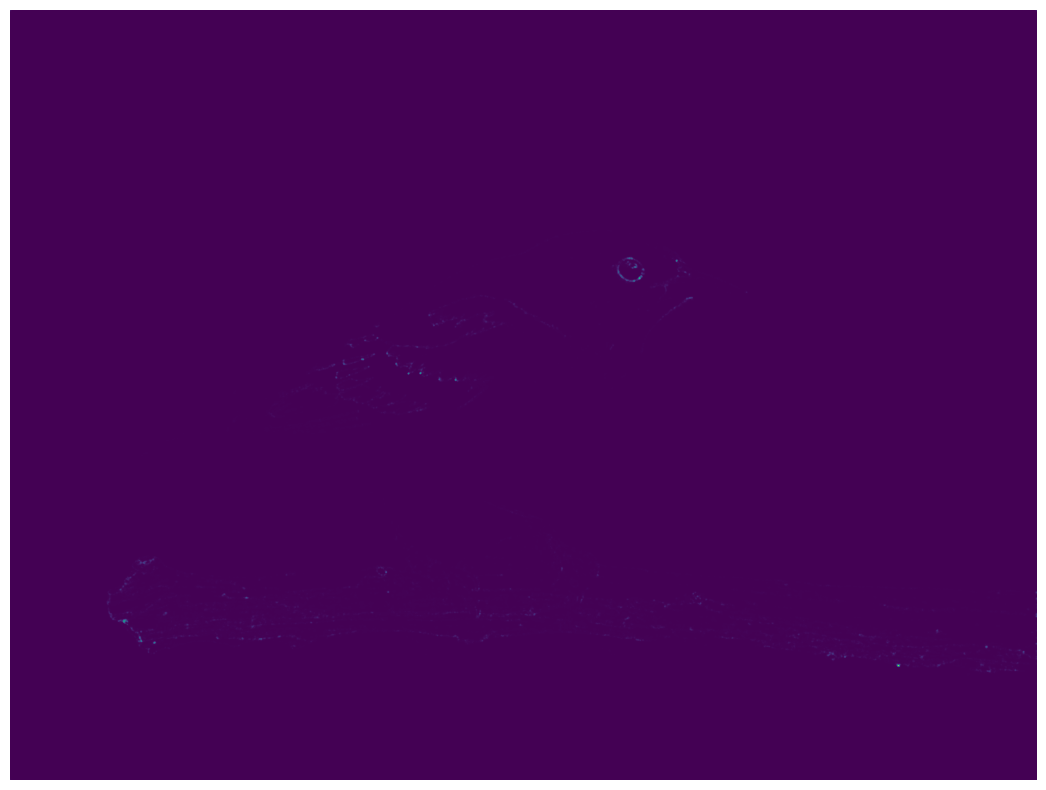

In [6]:
#2.5.2
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.feature import corner_harris
from skimage.color import rgb2gray

data = iio.imread('bird.png')
image_gray = rgb2gray(data)
coordinate = corner_harris(image_gray, k = 0.001)

plt.figure(figsize=(20,10))
plt.imshow(coordinate)
plt.axis('off')
plt.show()


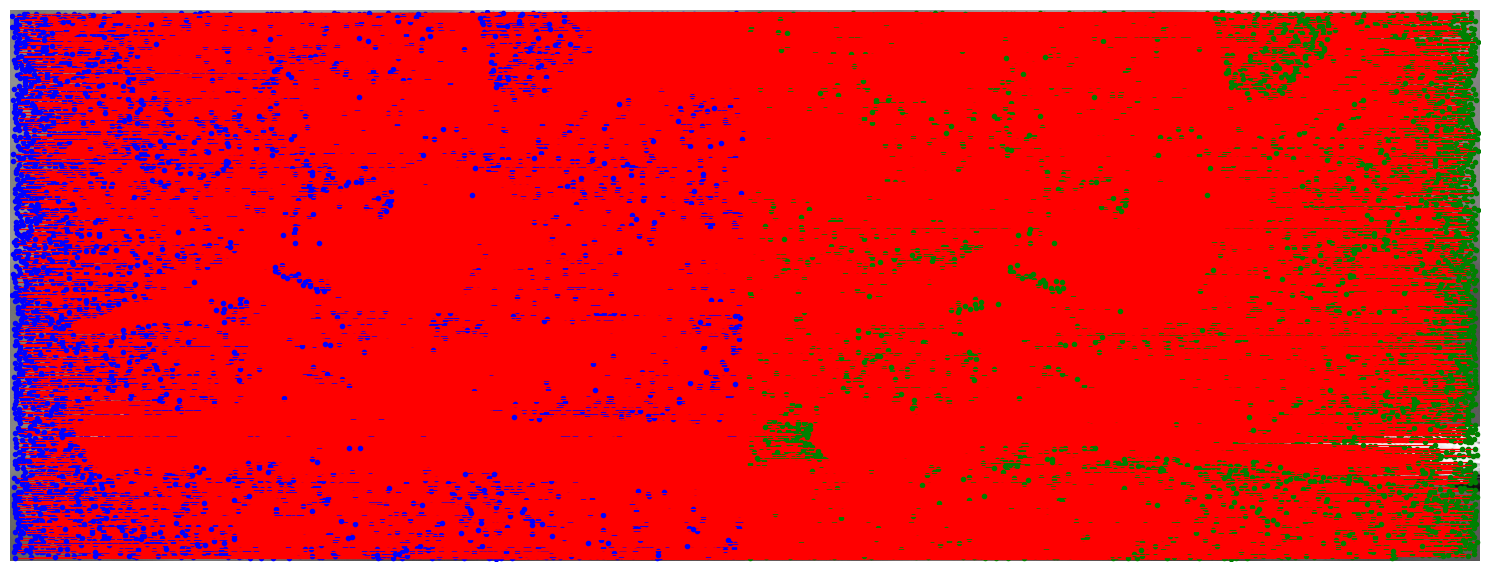

In [9]:
#2.6
from skimage.feature import corner_harris, corner_peaks
from skimage.color import rgb2gray
from skimage.util import img_as_float
import imageio.v2 as iio
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def extract_descriptors(image_gray, corners, patch_size=11):
    pad = patch_size // 2
    padded_img = np.pad(image_gray, pad, mode='constant')
    descriptors = []
    valid_corners = []

    for y, x in corners:
        patch = padded_img[y:y + patch_size, x:x + patch_size]
        if patch.shape == (patch_size, patch_size):
            descriptors.append(patch.flatten())
            valid_corners.append((y, x))

    return np.array(descriptors), np.array(valid_corners)

def match_descriptors(desc1, desc2):
    dists = cdist(desc1, desc2, 'euclidean')
    indices = np.argmin(dists, axis=1)
    matched_pairs = [(i, indices[i]) for i in range(len(indices))]
    return matched_pairs

# Load và chuyển xám
img1 = img_as_float(rgb2gray(iio.imread('bird.png')))
img2 = img_as_float(rgb2gray(iio.imread('bird.png')))

# Tìm điểm góc với Harris
corners1 = corner_peaks(corner_harris(img1), min_distance=5)
corners2 = corner_peaks(corner_harris(img2), min_distance=5)

# Trích xuất descriptor từ vùng lân cận
desc1, keypoints1 = extract_descriptors(img1, corners1)
desc2, keypoints2 = extract_descriptors(img2, corners2)

# Ghép đặc trưng
matches = match_descriptors(desc1, desc2)

# Vẽ kết quả
fig, ax = plt.subplots(figsize=(15, 10))
combined_img = np.hstack((img1, img2))
ax.imshow(combined_img, cmap='gray')

w1 = img1.shape[1]
for idx1, idx2 in matches:
    y1, x1 = keypoints1[idx1]
    y2, x2 = keypoints2[idx2]
    ax.plot([x1, x2 + w1], [y1, y2], 'r-', linewidth=0.8)
    ax.plot(x1, y1, 'bo', markersize=3)
    ax.plot(x2 + w1, y2, 'go', markersize=3)

ax.axis('off')
plt.tight_layout()
plt.show()
